# Continuous Assemblies: Multiple Linear Assemblies

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In this notebook we will talk about continuous assemblies. In this notebook we will board the assemblies of Multiples Linear Regressions of a continuous way. 

### We import all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings

In [2]:
warnings.filterwarnings("ignore")

### Creation of all the points to train and test the model

We set the seed

In [3]:
np.random.seed(10)

Creation of the points

In [4]:
# Breakpoints

v_1 = -6
v_2 = -3
v_3 = 0
v_4 = 3
v_5 = 6

V = []
V.append(v_1)
V.append(v_2)
V.append(v_3)
V.append(v_4)
V.append(v_5)

#---------------------------------------------------

# Parameters of the model

a = -9
b = 9

h = 0.25

#---------------------------------------------------

N = int((b - a)/h) + 1

#---------------------------------------------------

# Seting the first values of the domain and range

x = a - h

#---------------------------------------------------

X = []
y = []

#---------------------------------------------------

for i in range(N):

    x = round(x + h, 1)

    noise = np.random.uniform(-h, h)

    if x <= v_1:

        X.append(x)
        y.append((x + 10)*(1 + noise))

    elif (x > v_1) and (x <= v_2):

        X.append(x)
        y.append((2*x + 16)*(1 + noise))

    elif (x > v_2) and (x <= v_3):

        X.append(x)
        y.append((3*x + 19)*(1 + noise))

    elif (x > v_3) and (x <= v_4):

        X.append(x)
        y.append((-3*x + 19)*(1 + noise))

    elif (x > v_4) and (x <= v_5):

        X.append(x)
        y.append((-2*x + 16)*(1 + noise))

    else:

        X.append(x)
        y.append((-x + 10)*(1 + noise))

#---------------------------------------------------

Creation of dataframe

In [5]:
df = pd.DataFrame()

In [6]:
df['X'] = pd.Series(X).astype(float)
df['y'] = pd.Series(y).astype(float)

In [7]:
df

,X,y
0,-9.0,1.135660
1,-8.8,0.912451
2,-8.6,1.493554
3,-8.3,1.911483
4,-8.1,1.898582
...,...,...
68,8.1,1.739183
69,8.3,1.932756
70,8.6,1.077971
71,8.8,1.157695


Graph of these points

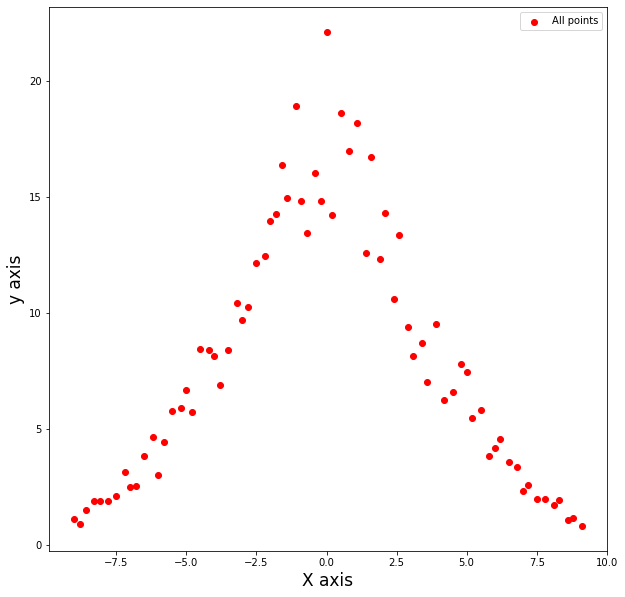

In [8]:
figure(figsize=(10,10))
plt.scatter(df['X'], df['y'], color = 'red', label = 'All points')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

Separating the train set and the test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [10]:
train = pd.DataFrame()
test = pd.DataFrame()

In [11]:
train['X'] = pd.Series(X_train).astype(float)
train['y'] = pd.Series(y_train).astype(float)

In [12]:
test['X'] = pd.Series(X_test).astype(float)
test['y'] = pd.Series(y_test).astype(float)

Graph of train and test set

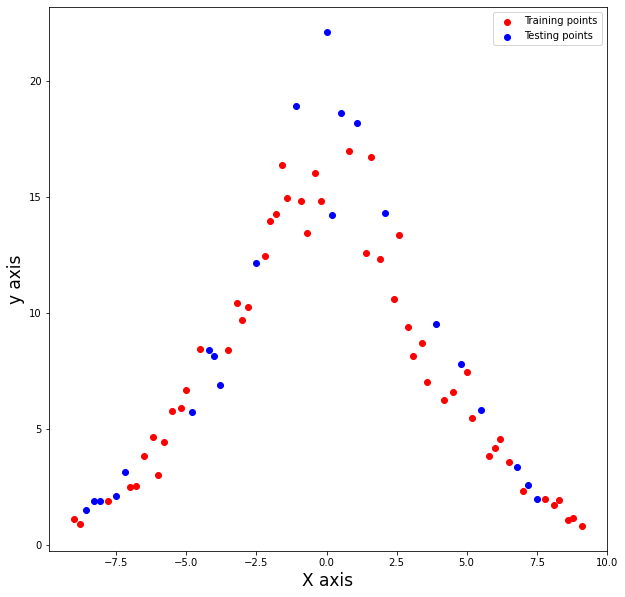

In [13]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

### Mathematical Development

First of all, we must to say exists two ways of to do this aasemble. The first "Left to the right" and the second "Right to the left".

### $ \underline{1. \ Left \ \ to \ \ the \ \ right:} $

We will consider the next $T$ functions: 

$ f_1(x) = \alpha_1^{1, left} \cdot x + \alpha_0^{1, left} \ \ \  $ for $ \ \ \ a \leq x \leq v_1 $

$ f_2(x) = \alpha_1^{2, left} \cdot x + \alpha_0^{2, left} \ \ \  $ for $ \ \ \ v_1 \leq x \leq v_2 $

$ f_3(x) = \alpha_1^{3, left} \cdot x + \alpha_0^{3, left} \ \ \  $ for $ \ \ \ v_2 \leq x \leq v_3 $

$ \vdots \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \vdots \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \vdots $

$ f_T(x) = \alpha_1^{T, left} \cdot x + \alpha_0^{T, left} \ \ \  $ for $ \ \ \ v_{T-1} \leq x \leq b $

*$\underline{Step \ 1:}$* We estimate the values of $ \alpha_1^{1, left} $ and $ \alpha_0^{1, left}$. From now on, we will write the known values with green color and the unkown values with red color. 

*$\underline{Step \ 2 \ (Recursive \ step):}$* For the union of the '$t$' function and '$t+1$' function to be continued we need the following equation is fulfilled:

$ f_t(v_t) = f_{t+1}(v_t) \ \ \ \forall \ t = 1, ..., T-1 $

$ \Rightarrow $

$ \textcolor{green}{\alpha_1^{t, left}} \cdot \textcolor{green}{v_t} + \textcolor{green}{\alpha_0^{t, left}} = \textcolor{red}{\alpha_1^{t+1, left}} \cdot \textcolor{green}{v_t} + \textcolor{red}{\alpha_0^{t+1, left}} $

$ \Rightarrow $

$ \boxed{\textcolor{red}{\alpha_0^{t+1, left}} = \textcolor{green}{\alpha_1^{t, left}} \cdot \textcolor{green}{v_t} + \textcolor{green}{\alpha_0^{t, left}} -  \textcolor{red}{\alpha_1^{t+1, left}} \cdot \textcolor{green}{v_t}} \ \ \ (*)  $

Substituting this result in $ f_{t+1}(x)$ we obtain:

$ f_{t+1}(x) = \textcolor{red}{\alpha_1^{t+1,left}} \cdot x + \textcolor{green}{\alpha_1^{t, left}} \cdot \textcolor{green}{v_t} + \textcolor{green}{\alpha_0^{t, left}} -  \textcolor{red}{\alpha_1^{t+1, left}} \cdot \textcolor{green}{v_t} $ 

$ \Rightarrow $

$ f_{t+1}(x) - (\textcolor{green}{\alpha_1^{t, left}} \cdot \textcolor{green}{v_t} + \textcolor{green}{\alpha_0^{t, left}}) = \textcolor{red}{\alpha_1^{t+1, left}} \cdot (x-\textcolor{green}{v_t}) $ 

We create the next new variables:

$ u_{t+1} = f_{t+1}(x) - (\textcolor{green}{\alpha_1^{t, left}} \cdot \textcolor{green}{v_t} + \textcolor{green}{\alpha_0^{t, left}}) $

$ W_{t+1} = x - \textcolor{green}{v_t} $

Thus we have the next linear regressión without intercept:

$ u_{t+1} = \textcolor{red}{\alpha_1^{t+1, left}} \cdot W_{t+1} $

Once we have the value $ \textcolor{red}{\alpha_1^{t+1, left}} $ we replaced this value in $(*)$ to obtain the value of $ \textcolor{red}{\alpha_0^{t+1,left}} $.

### $ \underline{2. \ Right \ \ to \ \ the \ \ left:} $

We will consider the next $T$ functions: 

$ f_1(x) = \alpha_1^{1, right} \cdot x + \alpha_0^{1, right} \ \ \  $ for $ \ \ \ a \leq x \leq v_1 $

$ f_2(x) = \alpha_1^{2, right} \cdot x + \alpha_0^{2, right} \ \ \  $ for $ \ \ \ v_1 \leq x \leq v_2 $

$ f_3(x) = \alpha_1^{3, right} \cdot x + \alpha_0^{3, right} \ \ \  $ for $ \ \ \ v_2 \leq x \leq v_3 $

$ \vdots \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \vdots \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \vdots $

$ f_T(x) = \alpha_1^{T, right} \cdot x + \alpha_0^{T, right} \ \ \  $ for $ \ \ \ v_{T-1} \leq x \leq b $

*$\underline{Step \ 1:}$* We estimate the values of $ \alpha_1^{T, right} $ and $ \alpha_0^{T, right}$. From now on, we will write the known values with green color and the unkown values with red color. 

*$\underline{Step \ 2 \ (Recursive \ step):}$* For the union of the '$t$' function and '$t+1$' function to be continued we need the following equation is fulfilled:

$ f_{t+1}(v_t) = f_t(v_t) \ \ \ \forall \ t = 1, ..., T-1 $

$ \Rightarrow $

$ \textcolor{green}{\alpha_1^{t+1, right}} \cdot \textcolor{green}{v_t} + \textcolor{green}{\alpha_0^{t+1, right}} = \textcolor{red}{\alpha_1^{t, right}} \cdot \textcolor{green}{v_t} + \textcolor{red}{\alpha_0^{t, right}} $

$ \Rightarrow $

$ \boxed{\textcolor{red}{\alpha_0^{t, right}} = \textcolor{green}{\alpha_1^{t+1, right}} \cdot \textcolor{green}{v_t} + \textcolor{green}{\alpha_0^{t+1, right}} -  \textcolor{red}{\alpha_1^{t, right}} \cdot \textcolor{green}{v_t}} \ \ \ (**)  $

Substituting this result in $ f_{t}(x)$ we obtain:

$ f_{t}(x) = \textcolor{red}{\alpha_1^{t,right}} \cdot x + \textcolor{green}{\alpha_1^{t+1, right}} \cdot \textcolor{green}{v_t} + \textcolor{green}{\alpha_0^{t+1, right}} -  \textcolor{red}{\alpha_1^{t, right}} \cdot \textcolor{green}{v_t} $ 

$ \Rightarrow $

$ f_{t}(x) - (\textcolor{green}{\alpha_1^{t+1, right}} \cdot \textcolor{green}{v_t} + \textcolor{green}{\alpha_0^{t+1, right}}) = \textcolor{red}{\alpha_1^{t, right}} \cdot (x-\textcolor{green}{v_t}) $ 

We create the next new variables:

$ u_{t} = f_{t}(x) - (\textcolor{green}{\alpha_1^{t+1, right}} \cdot \textcolor{green}{v_t} + \textcolor{green}{\alpha_0^{t+1, right}}) $

$ W_{t} = x - \textcolor{green}{v_t} $

Thus we have the next linear regressión without intercept:

$ u_{t} = \textcolor{red}{\alpha_1^{t, right}} \cdot W_{t} $

Once we have the value $ \textcolor{red}{\alpha_1^{t, right}} $ we replaced this value in $(**)$ to obtain the value of $ \textcolor{red}{\alpha_0^{t, right}} $.

# Training and Testing

In [14]:
def performance(train, test, label):

    abs_e_train = abs(train['y'] - train[label]).sum()/len(train)
    abs_e_train = round(abs_e_train, 2)

    sq_e_train = (abs(train['y'] - train[label])**2).sum()/len(train)
    sq_e_train = round(sq_e_train, 2)

    abs_e_test = abs(test['y'] - test[label]).sum()/len(test)
    abs_e_test = round(abs_e_test, 2)

    sq_e_test = (abs(test['y'] - test[label])**2).sum()/len(test)
    sq_e_test = round(sq_e_test, 2)

    print("--------------------------------------------------")
    
    print("ABSOLUTE ERROR:")
    print("Train: ", abs_e_train)
    print("Test: ", abs_e_test)

    print("--------------------------------------------------")

    print("SQUARED ERROR")
    print("Train: ", sq_e_train)
    print("Test: ", sq_e_test)
    print("--------------------------------------------------")

### $ \underline{1. \ Left \ \ to \ \ the \ \ right:} $

In [15]:
def train_left_to_right(V, a, b):

    T = len(V) + 1

    alpha_1 = []
    alpha_0 = []

    pred_LR_train = []
    pred_LR_test = []

    for i in range(T):

        if i == 0:

            f_train = (train['X'] <= V[i])
            f_test = (test['X'] <= V[i])

            X_1 = train[f_train][['X']].values
            y_1 = train[f_train]['y'].values

            reg_1 = LinearRegression(fit_intercept=True).fit(X_1, y_1)

            alpha_1.append(reg_1.coef_[0])
            alpha_0.append(reg_1.intercept_)

            pred_LR_train.append(train[f_train]['X']*alpha_1[i] + alpha_0[i])
            pred_LR_test.append(test[f_test]['X']*alpha_1[i] + alpha_0[i])

        elif (0 < i) & (i < (T-1)):

            f_train = (V[i-1] < train['X']) & (train['X'] <= V[i])
            f_test = (V[i-1] < test['X']) & (test['X'] <= V[i])

            z_t_1 = train[f_train]['y'].values - (alpha_1[i-1]*V[i-1] + alpha_0[i-1])
            W_t_1 = train[f_train][['X']].values - V[i-1]

            reg_t_1 = LinearRegression(fit_intercept=False).fit(W_t_1, z_t_1)

            alpha_1.append(reg_t_1.coef_[0])
            
            alpha_0_t_1 = alpha_1[i-1]*V[i-1] + alpha_0[i-1] - alpha_1[i]*V[i-1]

            alpha_0.append(alpha_0_t_1)

            pred_LR_train.append(train[f_train]['X']*alpha_1[i] + alpha_0[i])
            pred_LR_test.append(test[f_test]['X']*alpha_1[i] + alpha_0[i])

        else:

            f_train = (V[T-2] < train['X'])
            f_test = (V[T-2] < test['X'])

            z_t_1 = train[f_train]['y'].values - (alpha_1[i-1]*V[i-1] + alpha_0[i-1])
            W_t_1 = train[f_train][['X']].values - V[i-1]

            reg_t_1 = LinearRegression(fit_intercept=False).fit(W_t_1, z_t_1)

            alpha_1.append(reg_t_1.coef_[0])
            
            alpha_0_t_1 = alpha_1[i-1]*V[i-1] + alpha_0[i-1] - alpha_1[i]*V[i-1]

            alpha_0.append(alpha_0_t_1)

            pred_LR_train.append(train[f_train]['X']*alpha_1[i] + alpha_0[i])
            pred_LR_test.append(test[f_test]['X']*alpha_1[i] + alpha_0[i])
        
    pred_LR_train = pd.concat(pred_LR_train, axis = 0)
    pred_LR_test = pd.concat(pred_LR_test, axis = 0)

    train['pred_LR'] = pred_LR_train
    test['pred_LR'] = pred_LR_test

    return alpha_1, alpha_0, train, test

In [16]:
alpha_1_LR, alpha_0_LR, train, test = train_left_to_right(V, a, b)

**Performance**

In [17]:
performance(train, test, 'pred_LR')

--------------------------------------------------
ABSOLUTE ERROR:
Train:  0.89
Test:  1.35
--------------------------------------------------
SQUARED ERROR
Train:  1.37
Test:  3.88
--------------------------------------------------


**Graphs**

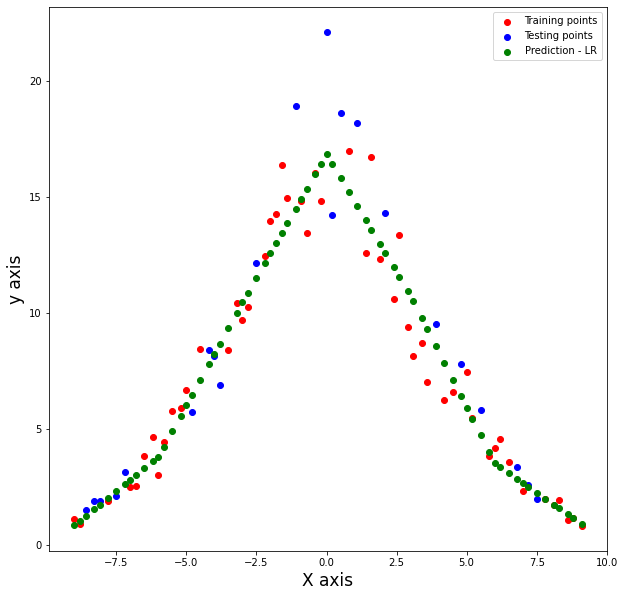

In [18]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')

plt.scatter(train['X'], train['pred_LR'], color = 'green', label = 'Prediction - LR')
plt.scatter(test['X'], test['pred_LR'], color = 'green')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

### $ \underline{2. \ Right \ \ to \ \ the \ \ left:} $

In [19]:
def train_right_to_left(V, a, b):

    T = len(V) + 1

    alpha_1 = []
    alpha_0 = []

    pred_RL_train = []
    pred_RL_test = []

    for j in range(T):

        i = (T - 1) - j

        if i == (T - 1):

            f_train = (V[T-2] < train['X'])
            f_test = (V[T-2] < test['X'])

            X_T = train[f_train][['X']].values
            y_T = train[f_train]['y'].values

            reg_T = LinearRegression(fit_intercept=True).fit(X_T, y_T)

            alpha_1.append(reg_T.coef_[0])
            alpha_0.append(reg_T.intercept_)

            pred_RL_train.append(train[f_train]['X']*alpha_1[j] + alpha_0[j])
            pred_RL_test.append(test[f_test]['X']*alpha_1[j] + alpha_0[j])

        elif (0 < i) & (i < (T-1)):

            f_train = (V[i-1] < train['X']) & (train['X'] <= V[i])
            f_test = (V[i-1] < test['X']) & (test['X'] <= V[i])

            z_t = train[f_train]['y'].values - (alpha_1[j-1]*V[i] + alpha_0[j-1])
            W_t = train[f_train][['X']].values - V[i]

            reg_t = LinearRegression(fit_intercept=False).fit(W_t, z_t)

            alpha_1.append(reg_t.coef_[0])
            
            alpha_0_t = alpha_1[j-1]*V[i] + alpha_0[j-1] - alpha_1[j]*V[i]

            alpha_0.append(alpha_0_t)

            pred_RL_train.append(train[f_train]['X']*alpha_1[j] + alpha_0[j])
            pred_RL_test.append(test[f_test]['X']*alpha_1[j] + alpha_0[j])

        else:

            f_train = (train['X'] <= V[i])
            f_test = (test['X'] <= V[i])

            z_t = train[f_train]['y'].values - (alpha_1[j-1]*V[i] + alpha_0[j-1])
            W_t = train[f_train][['X']].values - V[i]

            reg_t = LinearRegression(fit_intercept=False).fit(W_t, z_t)

            alpha_1.append(reg_t.coef_[0])
            
            alpha_0_t = alpha_1[j-1]*V[i] + alpha_0[j-1] - alpha_1[j]*V[i]

            alpha_0.append(alpha_0_t)

            pred_RL_train.append(train[f_train]['X']*alpha_1[j] + alpha_0[j])
            pred_RL_test.append(test[f_test]['X']*alpha_1[j] + alpha_0[j])

    pred_RL_train = pd.concat(pred_RL_train, axis = 0)
    pred_RL_test = pd.concat(pred_RL_test, axis = 0)

    train['pred_RL'] = pred_RL_train
    test['pred_RL'] = pred_RL_test

    alpha_1.reverse()
    alpha_0.reverse()

    return alpha_1, alpha_0, train, test

In [20]:
alpha_1_RL, alpha_0_RL, train, test = train_right_to_left(V, a, b)

**Performance**

In [21]:
performance(train, test, 'pred_RL')

--------------------------------------------------
ABSOLUTE ERROR:
Train:  0.9
Test:  1.19
--------------------------------------------------
SQUARED ERROR
Train:  1.96
Test:  2.84
--------------------------------------------------


**Graphs**

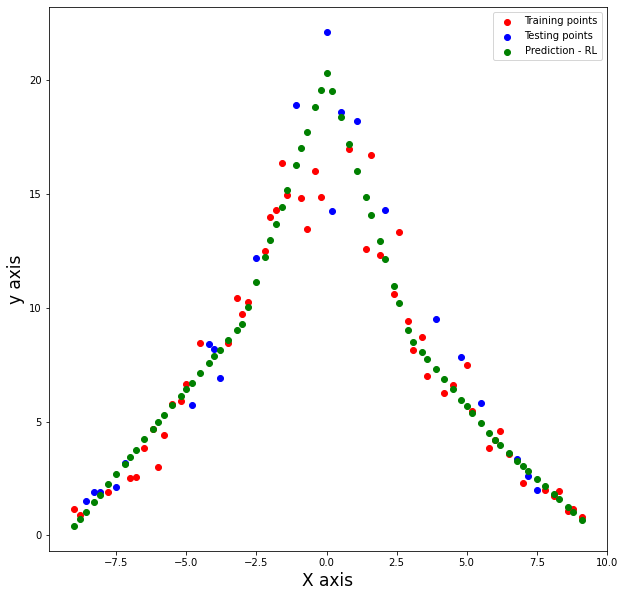

In [22]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')

plt.scatter(train['X'], train['pred_RL'], color = 'green', label = 'Prediction - RL')
plt.scatter(test['X'], test['pred_RL'], color = 'green')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

# Comparison

**Graphs**

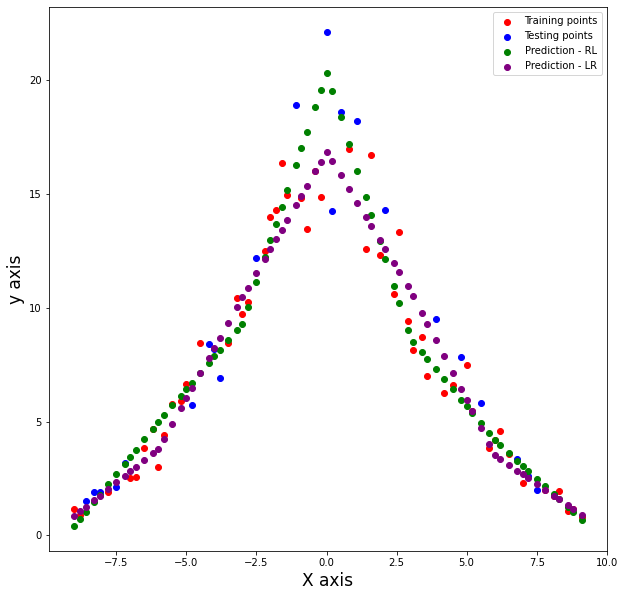

In [23]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')

plt.scatter(train['X'], train['pred_RL'], color = 'green', label = 'Prediction - RL')
plt.scatter(test['X'], test['pred_RL'], color = 'green')

plt.scatter(train['X'], train['pred_LR'], color = 'purple', label = 'Prediction - LR')
plt.scatter(test['X'], test['pred_LR'], color = 'purple')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

# UF problem

In chile exits an economic index called 'UF' which varies in function of the time. On this section we will apply the contents we develope previously to do a continuos linear regression of this index in function of the time.

### Open the ".xlsx" files

In [24]:
uf_2018 = pd.read_excel('UF_Values/2018.xls', skiprows=3, index_col = False)
uf_2019 = pd.read_excel('UF_Values/2019.xls', skiprows=3, index_col = False)
uf_2020 = pd.read_excel('UF_Values/2020.xls', skiprows=3, index_col = False)
uf_2021 = pd.read_excel('UF_Values/2021.xls', skiprows=3, index_col = False)
uf_2022 = pd.read_excel('UF_Values/2022.xls', skiprows=3, index_col = False)

uf = []
uf.append(uf_2018)
uf.append(uf_2019)
uf.append(uf_2020)
uf.append(uf_2021)
uf.append(uf_2022)

uf = pd.concat(uf, axis = 0)
uf = uf.reset_index()

uf = uf.drop(columns = ['index'])

WARNING *** file size (74042) not 512 + multiple of sector size (512)
WARNING *** file size (74042) not 512 + multiple of sector size (512)
WARNING *** file size (74042) not 512 + multiple of sector size (512)


In [25]:
def from_date_to_cont(date):

    day_month = {
                'Jan': 31, 'Feb': 28, 'Mar': 31, 'Apr': 30, 'May': 31, 'Jun': 30,
                'Jul': 31, 'Aug': 31, 'Sep': 30, 'Oct': 31, 'Nov': 30, 'Dec': 31
                }
    

    keys = list(day_month.keys())

    year = date.year
    month = date.month
    day = date.day

    if (year % 4 == 0):
        day_month['Feb'] = 29
    
    sum_days = 0

    for i in range(month-1):
        sum_days = sum_days + day_month[keys[i]]
    
    sum_days = sum_days + day

    prop_days = sum_days/np.array(list(day_month.values())).sum()

    return year + prop_days

In [26]:
uf['Dia'] = uf['Dia'].map(lambda x: from_date_to_cont(x))

### Visualizing the data

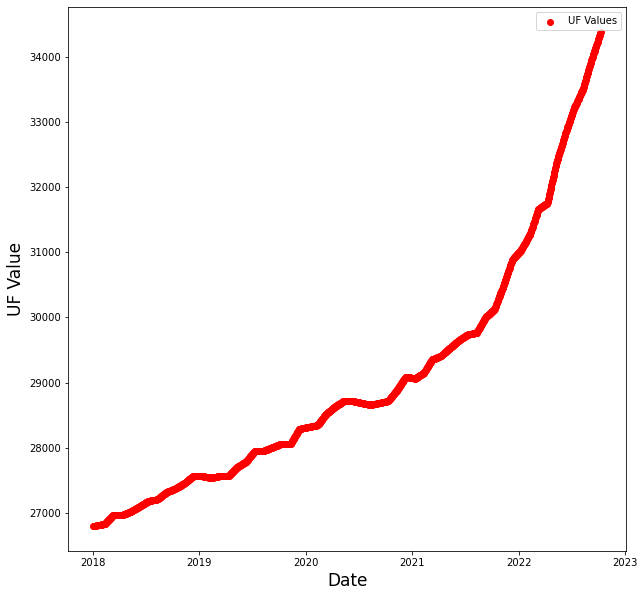

In [27]:
figure(figsize=(10,10))
plt.scatter(uf['Dia'], uf['Valor'], color = 'red', label = 'UF Values')

plt.xlabel('Date', size = 17)
plt.ylabel('UF Value', size = 17)

plt.legend()
plt.show()

# Creation of class (OOP)

In [28]:
class Tabla:

    def __init__(self, df, x_label, y_label):

        self.df = df
        self.x_label = x_label
        self.y_label = y_label


    def select_train_test_set(self, value):

        self.train = self.df[self.df[self.x_label] < value]
        self.test = self.df[self.df[self.x_label] >= value]


    def train_left_to_right(self, V):
        
        T = len(V) + 1

        alpha_1 = []
        alpha_0 = []

        for i in range(T):

            if i == 0:

                f_train = (self.train[self.x_label] <= V[i])

                X_1 = self.train[f_train][[self.x_label]].values
                y_1 = self.train[f_train][self.y_label].values

                reg_1 = LinearRegression(fit_intercept=True).fit(X_1, y_1)

                alpha_1.append(reg_1.coef_[0])
                alpha_0.append(reg_1.intercept_)

            elif (0 < i) & (i < (T-1)):

                f_train = (V[i-1] < self.train[self.x_label]) & (self.train[self.x_label] <= V[i])

                z_t_1 = self.train[f_train][self.y_label].values - (alpha_1[i-1]*V[i-1] + alpha_0[i-1])
                W_t_1 = self.train[f_train][[self.x_label]].values - V[i-1]

                reg_t_1 = LinearRegression(fit_intercept=False).fit(W_t_1, z_t_1)

                alpha_1.append(reg_t_1.coef_[0])
            
                alpha_0_t_1 = alpha_1[i-1]*V[i-1] + alpha_0[i-1] - alpha_1[i]*V[i-1]

                alpha_0.append(alpha_0_t_1)

            else:

                f_train = (V[T-2] < self.train[self.x_label])

                z_t_1 = self.train[f_train][self.y_label].values - (alpha_1[i-1]*V[i-1] + alpha_0[i-1])
                W_t_1 = self.train[f_train][[self.x_label]].values - V[i-1]

                reg_t_1 = LinearRegression(fit_intercept=False).fit(W_t_1, z_t_1)

                alpha_1.append(reg_t_1.coef_[0])
            
                alpha_0_t_1 = alpha_1[i-1]*V[i-1] + alpha_0[i-1] - alpha_1[i]*V[i-1]

                alpha_0.append(alpha_0_t_1)

        self.alpha_0_LR = alpha_0
        self.alpha_1_LR = alpha_1


    def predict_LR(self, V):

        inter_V = []

        for i in range(len(V)):

            if i == 0:

                inter_V.append(pd.Interval(-np.inf, V[0], closed = 'right'))
            
            else:

                inter_V.append(pd.Interval(V[i-1], V[i], closed = 'right'))

        inter_V.append(pd.Interval(V[len(V)-1], np.inf, closed = 'right'))

        self.inter_V = inter_V

        self.df['pred_LR'] = self.df[self.x_label].map(lambda x: self.predict_value_LR(x))
        self.train['pred_LR'] = self.train[self.x_label].map(lambda x: self.predict_value_LR(x))
        self.test['pred_LR'] = self.test[self.x_label].map(lambda x: self.predict_value_LR(x))


    def predict_value_LR(self, x_value):

        t = -1

        for i in range(len(self.inter_V)):

            if x_value in self.inter_V[i]:

                t = i
        
        return self.alpha_1_LR[t]*x_value + self.alpha_0_LR[t]


    def graph_pred_LR(self):

        figure(figsize=(10, 10))

        plt.scatter(self.train[self.x_label], self.train[self.y_label], color = 'red', label = 'train')
        plt.scatter(self.test[self.x_label], self.test[self.y_label], color = 'blue', label = 'test')
        plt.plot(self.df[self.x_label], self.df['pred_LR'], linewidth = 5, color = 'green', label = 'LR prediction')

        plt.legend()

        plt.show()


    def performance_LR(self):

        self.abs_e_train_LR = abs(self.train['pred_LR'] - self.train[self.y_label]).mean()
        self.abs_e_test_LR = abs(self.test['pred_LR'] - self.test[self.y_label]).mean()

        self.squ_e_train_LR = (abs(self.train['pred_LR'] - self.train[self.y_label])**2).mean()
        self.squ_e_test_LR = (abs(self.test['pred_LR'] - self.test[self.y_label])**2).mean()

        print("----------------------------------------------------------------------")

        print("ABSOLUTE ERROR:")
        print("Train: ", self.abs_e_train_LR)
        print("Test: ", self.abs_e_test_LR)

        print("----------------------------------------------------------------------")

        print("SQUARED ERROR:")
        print("Train: ", self.squ_e_train_LR)
        print("Test: ", self.squ_e_test_LR)

        print("----------------------------------------------------------------------")


    def train_right_to_left(self, V):

        T = len(V) + 1

        alpha_1 = []
        alpha_0 = []

        for j in range(T):

            i = (T - 1) - j

            if i == (T - 1):

                f_train = (V[T-2] < self.train[self.x_label])
                
                X_T = self.train[f_train][[self.x_label]].values
                y_T = self.train[f_train][self.y_label].values

                reg_T = LinearRegression(fit_intercept=True).fit(X_T, y_T)

                alpha_1.append(reg_T.coef_[0])
                alpha_0.append(reg_T.intercept_)

            elif (0 < i) & (i < (T-1)):

                f_train = (V[i-1] < self.train[self.x_label]) & (self.train[self.x_label] <= V[i])
                
                z_t = self.train[f_train][self.y_label].values - (alpha_1[j-1]*V[i] + alpha_0[j-1])
                W_t = self.train[f_train][[self.x_label]].values - V[i]

                reg_t = LinearRegression(fit_intercept=False).fit(W_t, z_t)

                alpha_1.append(reg_t.coef_[0])
            
                alpha_0_t = alpha_1[j-1]*V[i] + alpha_0[j-1] - alpha_1[j]*V[i]

                alpha_0.append(alpha_0_t)

            else:

                f_train = (self.train[self.x_label] <= V[i])

                z_t = self.train[f_train][self.y_label].values - (alpha_1[j-1]*V[i] + alpha_0[j-1])
                W_t = self.train[f_train][[self.x_label]].values - V[i]

                reg_t = LinearRegression(fit_intercept=False).fit(W_t, z_t)

                alpha_1.append(reg_t.coef_[0])
            
                alpha_0_t = alpha_1[j-1]*V[i] + alpha_0[j-1] - alpha_1[j]*V[i]

                alpha_0.append(alpha_0_t)

        alpha_1.reverse()
        alpha_0.reverse()

        self.alpha_0_RL = alpha_0
        self.alpha_1_RL = alpha_1

    
    def predict_RL(self, V):

        inter_V = []

        for i in range(len(V)):

            if i == 0:

                inter_V.append(pd.Interval(-np.inf, V[0], closed = 'right'))
            
            else:

                inter_V.append(pd.Interval(V[i-1], V[i], closed = 'right'))

        inter_V.append(pd.Interval(V[len(V)-1], np.inf, closed = 'right'))

        self.inter_V = inter_V

        self.df['pred_RL'] = self.df[self.x_label].map(lambda x: self.predict_value_RL(x))
        self.train['pred_RL'] = self.train[self.x_label].map(lambda x: self.predict_value_RL(x))
        self.test['pred_RL'] = self.test[self.x_label].map(lambda x: self.predict_value_RL(x))

    
    def predict_value_RL(self, x_value):

        t = -1

        for i in range(len(self.inter_V)):

            if x_value in self.inter_V[i]:

                t = i
        
        return self.alpha_1_RL[t]*x_value + self.alpha_0_RL[t]

    
    def graph_pred_RL(self):

        figure(figsize=(10, 10))

        plt.scatter(self.train[self.x_label], self.train[self.y_label], color = 'red', label = 'train')
        plt.scatter(self.test[self.x_label], self.test[self.y_label], color = 'blue', label = 'test')
        plt.plot(self.df[self.x_label], self.df['pred_RL'], linewidth = 5, color = 'green', label = 'RL prediction')

        plt.legend()

        plt.show()


    def performance_RL(self):

        self.abs_e_train_RL = abs(self.train['pred_RL'] - self.train[self.y_label]).mean()
        self.abs_e_test_RL = abs(self.test['pred_RL'] - self.test[self.y_label]).mean()

        self.squ_e_train_RL = (abs(self.train['pred_RL'] - self.train[self.y_label])**2).mean()
        self.squ_e_test_RL = (abs(self.test['pred_RL'] - self.test[self.y_label])**2).mean()

        print("----------------------------------------------------------------------")

        print("ABSOLUTE ERROR:")
        print("Train: ", self.abs_e_train_RL)
        print("Test: ", self.abs_e_test_RL)

        print("----------------------------------------------------------------------")

        print("SQUARED ERROR:")
        print("Train: ", self.squ_e_train_RL)
        print("Test: ", self.squ_e_test_RL)

        print("----------------------------------------------------------------------")


    def graph_comparision(self):

        figure(figsize=(10, 10))

        plt.scatter(self.train[self.x_label], self.train[self.y_label], color = 'red', label = 'train')
        plt.scatter(self.test[self.x_label], self.test[self.y_label], color = 'blue', label = 'test')
        plt.plot(self.df[self.x_label], self.df['pred_LR'], linewidth = 5, color = 'green', label = 'LR prediction')
        plt.plot(self.df[self.x_label], self.df['pred_RL'], linewidth = 5, color = 'purple', label = 'RL prediction')

        plt.legend()

        plt.show()

In [29]:
tabla_uf = Tabla(uf, 'Dia', 'Valor')
tabla_uf.select_train_test_set(2022.5)

In [30]:
V = [2019, 2020, 2021, 2022]

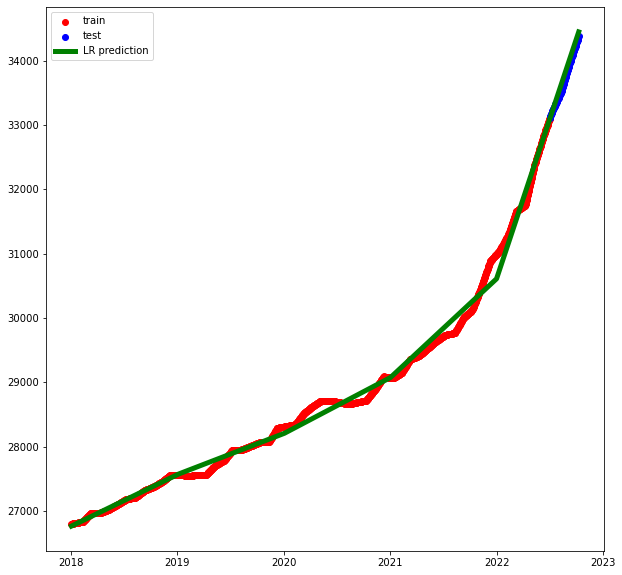

----------------------------------------------------------------------
ABSOLUTE ERROR:
Train:  80.52397710340593
Test:  65.52872503731443
----------------------------------------------------------------------
SQUARED ERROR:
Train:  12344.2028360187
Test:  5176.307021416694
----------------------------------------------------------------------


In [31]:
tabla_uf.train_left_to_right(V)
tabla_uf.predict_LR(V)
tabla_uf.graph_pred_LR()
tabla_uf.performance_LR()

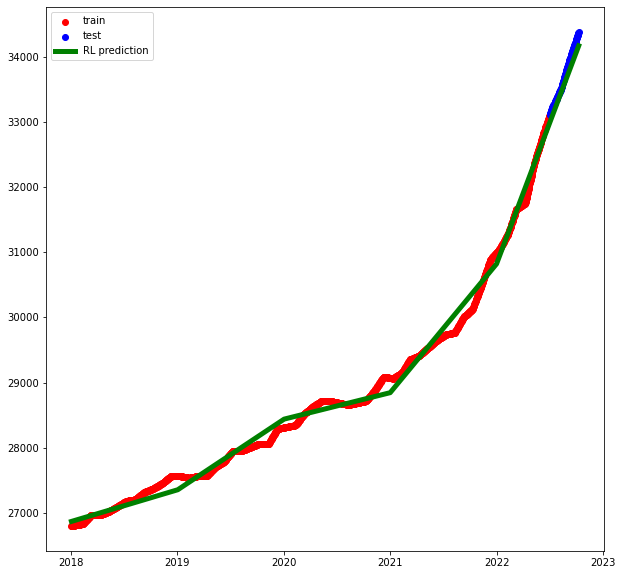

----------------------------------------------------------------------
ABSOLUTE ERROR:
Train:  94.07834260293053
Test:  129.86335645400933
----------------------------------------------------------------------
SQUARED ERROR:
Train:  13702.860874613521
Test:  18838.91111148658
----------------------------------------------------------------------


In [32]:
tabla_uf.train_right_to_left(V)
tabla_uf.predict_RL(V)
tabla_uf.graph_pred_RL()
tabla_uf.performance_RL()

**Graph Comparision**

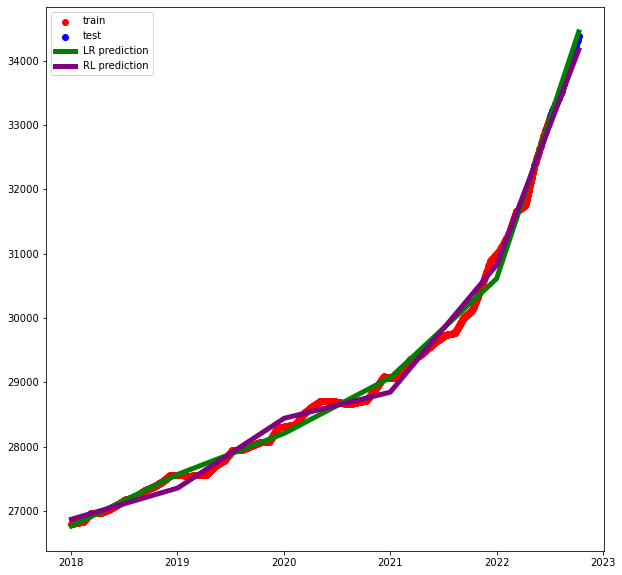

In [33]:
tabla_uf.graph_comparision()

**Comments:**

We can see the best performance is from LR model.

**Predict**

We will use this model to predict the value of this index at the beginning of 2023.

In [34]:
tabla_uf.predict_value_LR(2023)

35577.52414116077